<a href="https://colab.research.google.com/github/justin-hsieh/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

In [0]:
import seaborn as sns
sns.__version__

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load & look at data

In [0]:

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

In [0]:
lifespan.head()

In [0]:
population.head()

In [0]:
pd.options.display.max_columns = 500
entities.head()

In [0]:
concepts.head()

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
df = pd.merge(income, lifespan)
df.head()

In [0]:
df = pd.merge(df, population)
df.shape

In [0]:
entities['world_6region'].value_counts()

In [0]:
entities_variables = ['country','name','world_6region']
entities = entities[entities_variables]
print(entities.shape)
entities.head()



In [0]:
merged = pd.merge(df, entities, left_on='geo',right_on='country')
print(merged.shape)
merged.head()

In [0]:
merged = merged.drop(['geo','country'], axis='columns')

In [0]:
merged = merged.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
})

merged.head()

## Explore data

In [0]:
merged.dtypes

In [0]:
merged.describe()

In [0]:
merged.describe(exclude='number')

In [0]:
merged.country.unique()

In [0]:
usa = merged[merged.country=='United States']
usa.head()

In [0]:
usa[usa.year.isin([1818,1918,2018])]

In [0]:
china = merged[merged.country=='China']
china[china.year.isin([1818,1918,2018])]

## Plot visualization

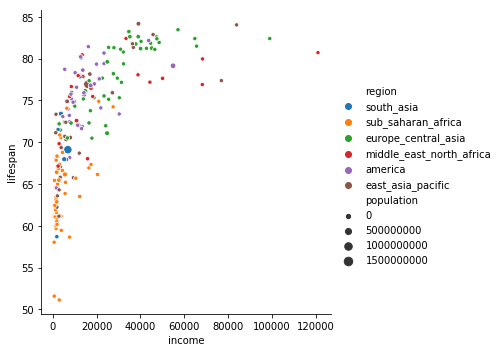

In [85]:
now = merged[merged['year']==2018]
sns.relplot(x='income',y='lifespan', hue='region',size='population', data=now);

In [88]:
qatar_now = now[(now.income > 80000) & (now.country == 'Qatar')].sort_values(by='income')
qatar_now

,year,income,lifespan,population,country,region
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa


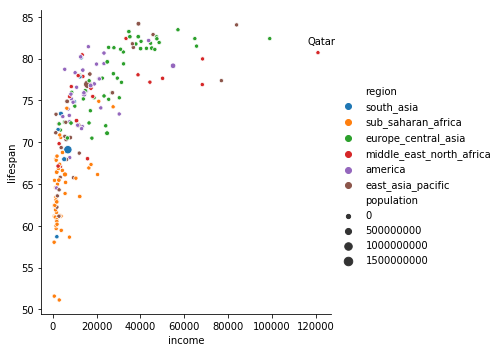

In [91]:


sns.relplot(x='income',y='lifespan', hue='region',size='population', data=now);
plt.text(x=qatar_now.income-5000 ,y=qatar_now.lifespan+1 ,s='Qatar');

In [0]:
years = [1818,1918,2018]

centuries = merged[merged.year.isin(years)]


sns.relplot(x='income',y='lifespan', hue='region',size='population', col='year', data=centuries);
plt.xscale('log');
#plt.text(x=qatar_now.income-5000 ,y=qatar_now.lifespan+1 ,s='Qatar');

In [0]:
years = [1918,1938,1958, 1978, 1998, 2018]

decades = merged[merged.year.isin(years)]

sns.relplot(x='income',y='lifespan', hue='region',size='population', col='year', data=decades);
#plt.xscale('log');

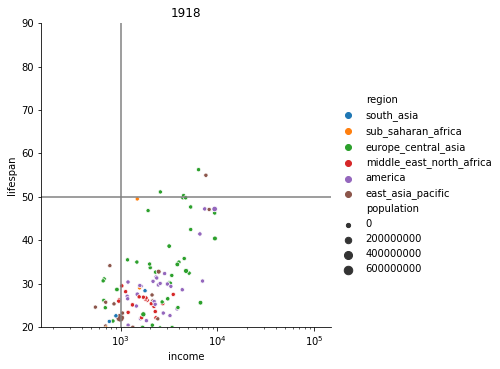

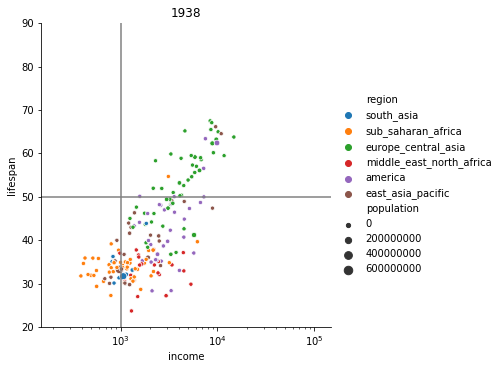

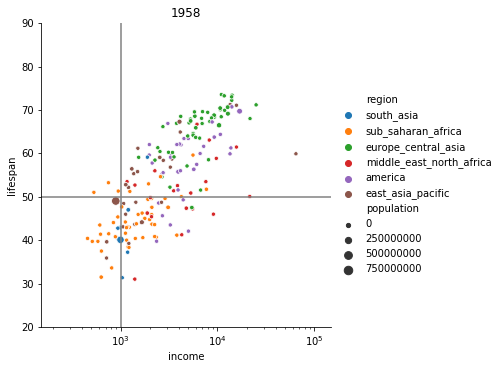

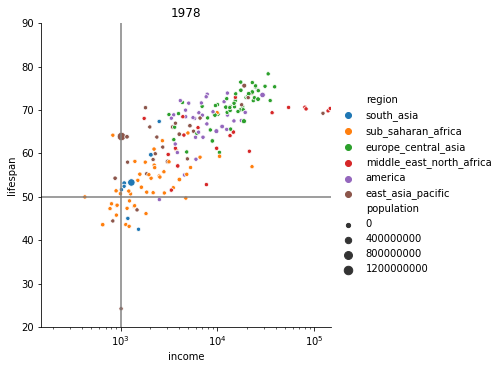

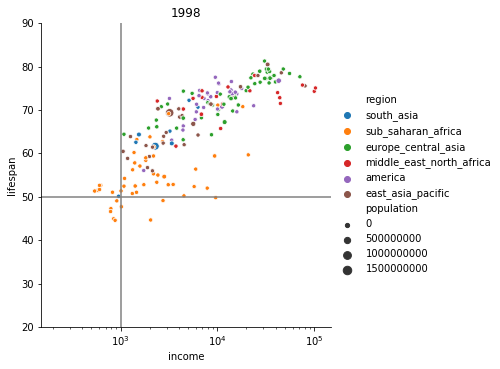

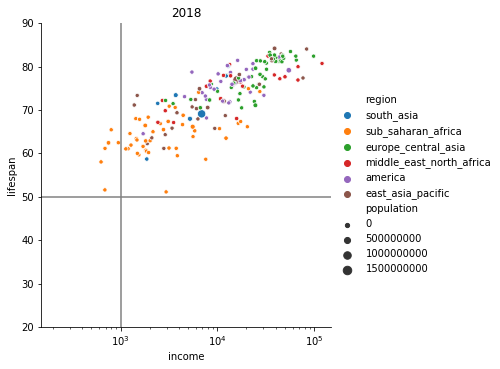

In [107]:
for year in years:
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=merged[merged.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey')
    plt.axvline(x=1000, color='grey')    

In [0]:
merged[(merged.year==1918) & (merged.lifespan > 50)]

In [0]:
merged[(merged.year==2018) & (merged.lifespan < 50)]

## Analyze outliers

## Plot multiple years

## Point out a story

In [0]:
year = 2018 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=merged[merged.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

# ASSIGNMENT
Replicate the lesson code

Improve Gapminder graph, 
Add title and subtitle to graph


# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project